In [1]:
# File created by rydhslmy at 2022/11/30 09:00 AM.
# Description : Reinforcement Learning Algorithm for finding shortest path in a Maze.
# Purpose : Act as comparison for the Deep Q-Network models that is to be created.

In [2]:
# ---------- Import Libraries ---------- #
import os
import random
import math
from IPython.display import SVG

# Import Custom libraries
# from lib import qLearning as ql
from lib import qlCuda as ql
from lib import support as fn
from lib import drawSVG

File 'maze_config' exist in '/home/amri/Documents/GitHub/Rl_Sim'
8 maze cofing file(s) detected.
1) 22083010X10c4.txt
2) 22100605X05c0.txt
3) 22100605X05c1.txt
4) 22100605X05c2.txt
5) 22100605X05c3.txt
6) 22100605X05c4.txt
7) 22113040X40c0.txt
8) 22113040X40c1.txt

Input Select Index (1-8) : 1

Selected '22083010X10c4.txt'
Loading 22083010X10c4.txt...
	File consists of 203 lines of data.
	Maze size loaded. 10X10 (100 states)
	Number of action loaded. There are 4 actions
	Next State list loaded.
	Current Reward list loaded.
Finish loading 22083010X10c4.txt


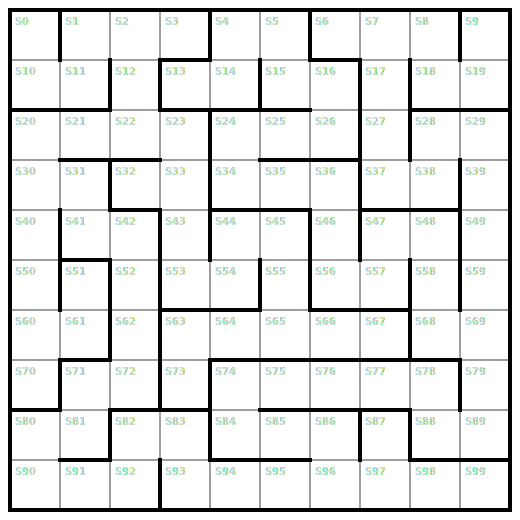

In [3]:
# ---------- Load Maze Config ---------- #
## Target maze config file
config_file = 'maze_config'
current_dir = os.getcwd()
config_path = fn.gen_path(current_dir, config_file)

## Select maze config file
mazeConfig_file = fn.select_maze(config_path)


## Read maze config file
maze_config = fn.load_mazeConfig(config_path, mazeConfig_file)

## Pass content of maze_config
maze_x = maze_config[0]
maze_y = maze_config[1]
total_state = maze_config[2]
total_act = maze_config[3]
ns_list = maze_config[4]
rt_list = maze_config[5]

## Display Maze
scale = 50*maze_x
maze_svg = 'current_maze.svg'
fn.draw_maze(scale, maze_x, maze_y, ns_list, maze_svg)
display(SVG(maze_svg))


In [4]:
# Select goal state randomly from possible candidates
possible_goals = fn.find_goals(ns_list)
goal_state = random.choice(possible_goals)
goal_state = 3
print(possible_goals)
print(goal_state)

[0, 3, 6, 9, 13, 32, 51, 67, 70, 73, 87, 99]
3


In [5]:
# Set Goal State Reward
goal_reward = 10

# Update Reward Matrix
if (goal_state > (total_state-1)):
    print("Goal State cannot be used. Try again")
else:
    for i in range(total_state):
        for j in range(total_act):
            if (ns_list[i][j]==goal_state)&(i != goal_state):
                rt_list[i][j] = goal_reward
    print('Current Reward list updated.')

Current Reward list updated.


In [6]:
# Set simulation's hyparameters
total_episode = 10000
max_step = 10*total_state
alpha = 0.125 # Learning Rate
gamma = 0.875 # Discount Factor
epsilon = 0.99

In [7]:
# Brute force learning

# Initialize Software Model
sw = ql.qrl(total_state = total_state,
            total_action = total_act,
            learning_rate = alpha, 
            discount_factor = gamma,
            initial_exploration_rate = epsilon,
            max_episode = total_episode,
            max_step = max_step,
            goal_state = goal_state,
            reward_matrix = rt_list,
            ns_matrix = ns_list,
            random_pool = possible_goals
           )

notFinished = True
while(notFinished):
    # Start software learning
    sw.start()
    
    # Check convergence
    pass_count = 0
    failed_start = []
    for start_state in possible_goals:
        if (start_state != goal_state):
            isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=True)
            if (isPass):
                pass_count += 1
            else:
                failed_start.append(start_state)
    print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')
    if (pass_count==len(possible_goals)-1):
        notFinished = False
    else:
        print(failed_start)
        total_episode += 1000
    print()
    notFinished = False
#     # Initialize Software Model
#     init_Q = sw.Q
# #     print(init_Q)
#     sw = ql.qrl(total_state = total_state,
#                 total_action = total_act,
#                 learning_rate = alpha, 
#                 discount_factor = gamma,
#                 initial_exploration_rate = epsilon,
#                 max_episode = total_episode,
#                 max_step = max_step,
#                 goal_state = goal_state,
#                 reward_matrix = rt_list,
#                 ns_matrix = ns_list,
#                 random_pool = possible_goals,
#                 Q_Matrix = init_Q
#                )

Start Q-learning...
Execution time = 4.53585958480835s
Finished learning for 10000 episode(s)
Goal reached count: 11/11



In [ ]:
pass_count = 0

for start_state in possible_goals:
    if (start_state != goal_state):
        isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=False)
        if (isPass):
            pass_count += 1
#         scale = 1000
        svg_file = 'shortest_path.svg'
        h = drawSVG.drawPath(scale=scale, mx=maze_x, my = maze_y, ns = ns_list, path = record)
        h.draw_path(svg_file)
        display(SVG(svg_file))

print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')

In [ ]:
# print(sw.state_visit_count)
# print()
# print(sw.cumulative_rewards)
# print()
# print(sw.step_per_episode)
# print()
# print(sw.exploration_per_episode)
# print()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
isc = sw.state_visit_count.reshape(-1, maze_x).tolist()
fig, ax = plt.subplots(figsize = (20, 20))
sb.heatmap(isc, annot=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Cumulative Reward')
ax.plot(sw.cumulative_rewards)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Exploration per episode')
ax.plot(sw.exploration_per_episode)
plt.show()

In [ ]:
sw.step_per_episode

In [ ]:
fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Step per episode')
ax.plot(sw.step_per_episode)
plt.show()

In [ ]:
import numpy as np

In [ ]:
array1 = np.array(sw.step_per_episode)
array2 = np.array(sw.exploration_per_episode)
subtracted_array = np.subtract(array1, array2)
step_per_episode = list(subtracted_array)

fig, ax = plt.subplots(figsize = (11, 9))
ax.title.set_text('Exploitation per episode')
ax.plot(step_per_episode)
plt.show()

In [ ]:
total_state // 25

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

n_graph = total_state//25

fig, ax = plt.subplots(1, n_graph, figsize=(7, 70))
for i in range(n_graph):
    start_slice = i*25
    end_slice = start_slice+25
    im1 = ax[i].imshow(sw.Q[start_slice:end_slice], interpolation='none')
    ax[i].set_title(f"Q-Matrix[{start_slice+1}:{end_slice}]", pad=35)
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(1))

    divider1 = make_axes_locatable(ax[i])
    cax1 = divider1.append_axes("top", size="0.2%", pad=0.05)
    plt.colorbar(im1, cax=cax1, orientation="horizontal")
    cax1.xaxis.set_ticks_position("top")
fig.tight_layout(pad=1.0)
plt.show()